In [15]:
import pandas as pd
import numpy as np
from datetime import datetime

# We set max column and rows
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')


# Import matplotlib library here
import plotly.express as px

In [16]:
accidents = pd.read_csv('/Users/shin/desktop/lse_daca/final_project/accidents/accidents.csv')

In [17]:
accidents.head()

,id,lat,lon,location,date,time,borough,mode,year
0,355411,51.295233,-0.131061,On Ditches Lane 1400 metres north of The Junct...,2019-06-01,11:42:00,Croydon,PedalCycle,2019
1,310697,51.306105,-0.148022,Starrock Road junction with Petworth Close,2017-04-26,07:15:00,Croydon,PedalCycle,2017
2,310704,51.308056,-0.129292,Mead Way 21 metres south of junction with Toll...,2017-04-24,07:45:00,Croydon,PedalCycle,2017
3,367157,51.310405,-0.144721,On Harwoods Garage- Brighton Road Near The Jun...,2019-11-12,14:20:00,Croydon,PedalCycle,2019
4,310346,51.310609,0.035676,Main Road 25 metres south of junction with Leb...,2017-12-02,14:09:00,Bromley,PedalCycle,2017


In [18]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13231 entries, 0 to 13230
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        13231 non-null  int64  
 1   lat       13231 non-null  float64
 2   lon       13231 non-null  float64
 3   location  13231 non-null  object 
 4   date      13231 non-null  object 
 5   time      13231 non-null  object 
 6   borough   13231 non-null  object 
 7   mode      13231 non-null  object 
 8   year      13231 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 930.4+ KB


In [35]:
# changing the year column into categorical for visualisation purposes.
accidents['year'] = accidents['year'].astype(str)
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13231 entries, 0 to 13230
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        13231 non-null  int64  
 1   lat       13231 non-null  float64
 2   lon       13231 non-null  float64
 3   location  13231 non-null  object 
 4   date      13231 non-null  object 
 5   time      13231 non-null  object 
 6   borough   13231 non-null  object 
 7   mode      13231 non-null  object 
 8   year      13231 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 930.4+ KB


In [36]:
# Finding the number of pedalcycle accidents in each borough and year.
accidents_count = accidents.groupby(['year','borough'])[['mode']].count().reset_index()
accidents_count

,year,borough,mode
0,2017,Barking & Dagenham,41
1,2017,Barnet,59
2,2017,Bexley,18
3,2017,Brent,85
4,2017,Bromley,92
5,2017,Camden,238
6,2017,City of London,117
7,2017,Croydon,67
8,2017,Ealing,96
9,2017,Enfield,50


In [41]:
df = accidents_count
fig = px.bar(df, x="borough", y="mode", color = 'year')
fig.show()

Westminister southwark and Lambeth have the highest accident counts over the 3 years.
In contrast, Bexley, sutton and harrow have the least number of accidents over the 3 years

In [65]:
## creating a word cloud to visualise the most common location that have frequent accidents in london
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
import matplotlib.pyplot as plt 
import seaborn as sns
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
# Import the class.
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to /Users/shin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
# Transform data to lowercase.
accidents['location'] = accidents['location'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
accidents['location'].head()

0    on ditches lane 1400 metres north of the junct...
1           starrock road junction with petworth close
2    mead way 21 metres south of junction with toll...
3    on harwoods garage- brighton road near the jun...
4    main road 25 metres south of junction with leb...
Name: location, dtype: object

In [47]:
# Remove punctuation.
accidents['location'] = accidents['location'].str.replace('[^\w\s]','')

# Preview the result.
accidents['location'].head()

0    on ditches lane 1400 metres north of the junct...
1           starrock road junction with petworth close
2    mead way 21 metres south of junction with toll...
3    on harwoods garage brighton road near the junc...
4    main road 25 metres south of junction with leb...
Name: location, dtype: object

In [48]:
# Check the number of duplicate values in the COMMENTS column.
accidents.location.duplicated().sum()

1106

In [49]:
# Drop duplicates.
accidents_data = accidents.drop_duplicates(subset=['location'])

# Preview data.
accidents_data.reset_index(inplace=True)
accidents_data.head()

,index,id,lat,lon,location,date,time,borough,mode,year
0,0,355411,51.295233,-0.131061,on ditches lane 1400 metres north of the junct...,2019-06-01,11:42:00,Croydon,PedalCycle,2019
1,1,310697,51.306105,-0.148022,starrock road junction with petworth close,2017-04-26,07:15:00,Croydon,PedalCycle,2017
2,2,310704,51.308056,-0.129292,mead way 21 metres south of junction with toll...,2017-04-24,07:45:00,Croydon,PedalCycle,2017
3,3,367157,51.310405,-0.144721,on harwoods garage brighton road near the junc...,2019-11-12,14:20:00,Croydon,PedalCycle,2019
4,4,310346,51.310609,0.035676,main road 25 metres south of junction with leb...,2017-12-02,14:09:00,Bromley,PedalCycle,2017


In [50]:
# String all the comments together in a single variable.
# Create an empty string variable.
all_location = ''
for i in range(accidents_data.shape[0]):
    # Add each location.
    all_location = all_location + accidents_data['location'][i]

In [51]:
all_location

'on ditches lane 1400 metres north of the junction with rook lanestarrock road junction with petworth closemead way 21 metres south of junction with tollers laneon harwoods garage brighton road near the junction with namain road 25 metres south of junction with lebanon gardensbrighton road 21 metres east of junction with woodplace laneportnalls road 500 metres south of junction with portnalls rise coulsdonon jail lane near the junction with the laurelssingle street junction with berrys hillon brighton road near the junction with marlpit lanelion green road 20 metres south east of junction with chisptead valley roadon main road near the junction with main roadon higher drive 30 metres north of the junction with cullesden rob2030 junction with windermere roadstoats nest road junction with windemere roadwoodcote grove road junction with the wenddowne road 0 metres south of junction with downe roadhigher drive junction with burcott roadjewels hill 100 metres west of junction with oaklands 

In [55]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900,
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_location) 

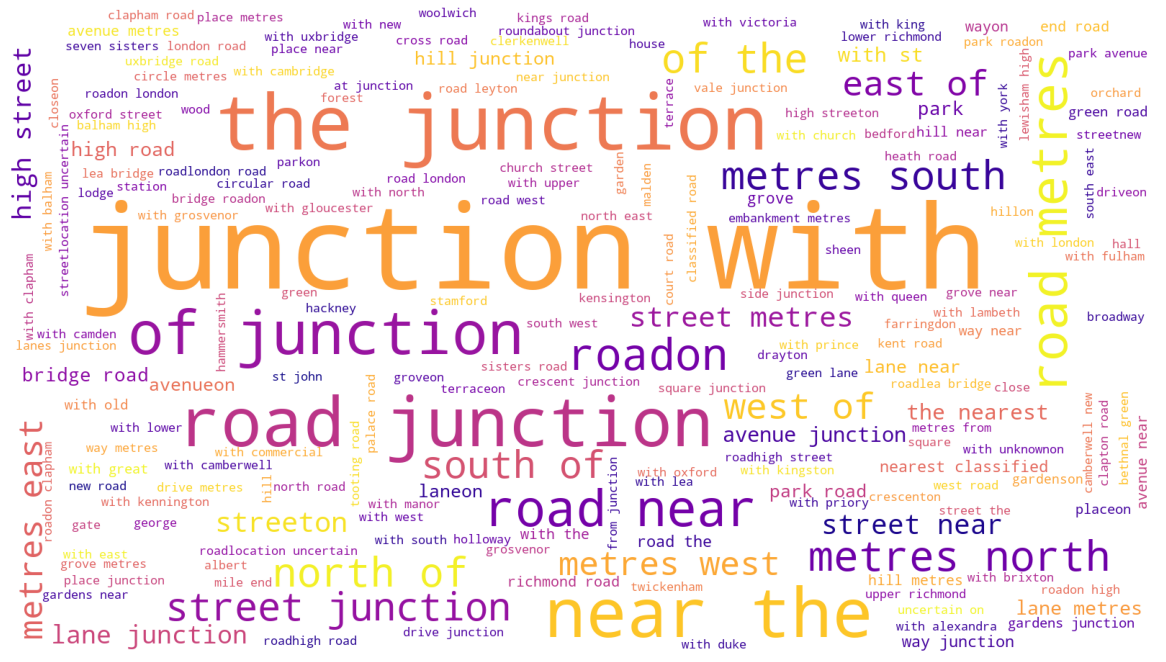

In [56]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
# tokenising the text data

In [62]:
tokenised_sentence = sent_tokenize(all_location)

# Check the result.
print(tokenised_sentence)

['on ditches lane 1400 metres north of the junction with rook lanestarrock road junction with petworth closemead way 21 metres south of junction with tollers laneon harwoods garage brighton road near the junction with namain road 25 metres south of junction with lebanon gardensbrighton road 21 metres east of junction with woodplace laneportnalls road 500 metres south of junction with portnalls rise coulsdonon jail lane near the junction with the laurelssingle street junction with berrys hillon brighton road near the junction with marlpit lanelion green road 20 metres south east of junction with chisptead valley roadon main road near the junction with main roadon higher drive 30 metres north of the junction with cullesden rob2030 junction with windermere roadstoats nest road junction with windemere roadwoodcote grove road junction with the wenddowne road 0 metres south of junction with downe roadhigher drive junction with burcott roadjewels hill 100 metres west of junction with oaklands

In [66]:
# Tokenise the text data.
tokenised_word = word_tokenize(all_location)

# Check the result.
print(tokenised_word)

['on', 'ditches', 'lane', '1400', 'metres', 'north', 'of', 'the', 'junction', 'with', 'rook', 'lanestarrock', 'road', 'junction', 'with', 'petworth', 'closemead', 'way', '21', 'metres', 'south', 'of', 'junction', 'with', 'tollers', 'laneon', 'harwoods', 'garage', 'brighton', 'road', 'near', 'the', 'junction', 'with', 'namain', 'road', '25', 'metres', 'south', 'of', 'junction', 'with', 'lebanon', 'gardensbrighton', 'road', '21', 'metres', 'east', 'of', 'junction', 'with', 'woodplace', 'laneportnalls', 'road', '500', 'metres', 'south', 'of', 'junction', 'with', 'portnalls', 'rise', 'coulsdonon', 'jail', 'lane', 'near', 'the', 'junction', 'with', 'the', 'laurelssingle', 'street', 'junction', 'with', 'berrys', 'hillon', 'brighton', 'road', 'near', 'the', 'junction', 'with', 'marlpit', 'lanelion', 'green', 'road', '20', 'metres', 'south', 'east', 'of', 'junction', 'with', 'chisptead', 'valley', 'roadon', 'main', 'road', 'near', 'the', 'junction', 'with', 'main', 'roadon', 'higher', 'drive',

In [68]:
# Create a frequency distribution object.
freq_dist_of_words = FreqDist(tokenised_word)

# Show the five most common elements in the data set.
freq_dist_of_words.most_common(10)

[('junction', 11895),
 ('with', 11853),
 ('road', 6887),
 ('the', 4234),
 ('of', 3188),
 ('metres', 3156),
 ('near', 2945),
 ('street', 2125),
 ('roadon', 1481),
 ('north', 1159)]

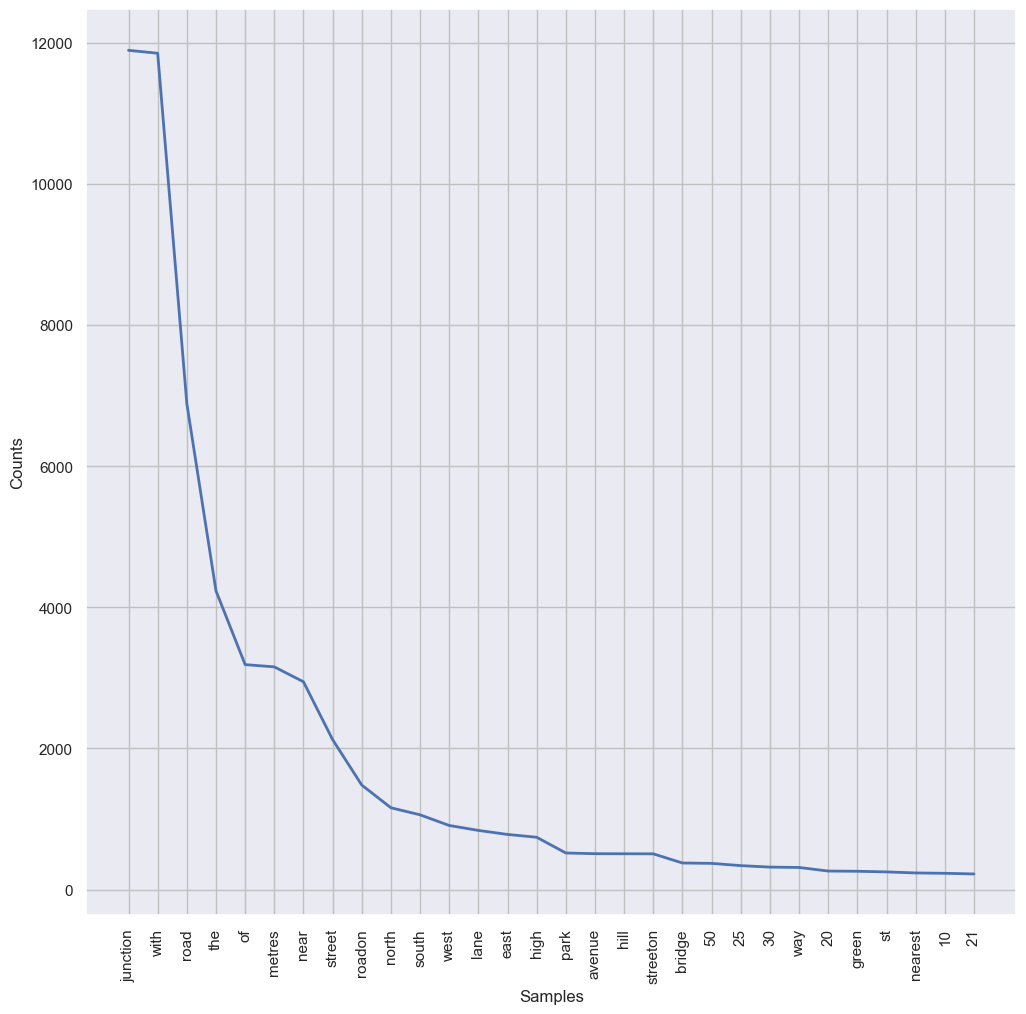

In [69]:
# Define the figure and axes.
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(12, 12)

# Plot the data set.
freq_dist_of_words.plot(30, cumulative=False)

# Display the result.
plt.show()

In [ ]:
# It appears that the location in which accidents commonly occur in London is at junctions.